# **Import the required packages**

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.color import rgb2gray
from math import sqrt

# **Import the image**

In [141]:
#Now we will do the morphological operations on image of sunflower
from google.colab import files
uploaded = files.upload()

Saving virus.jpg to virus.jpg


In [182]:
virus = imread('virus.jpg')

**#Convert the image to Binary**

Text(0.5, 1.0, 'Binary')

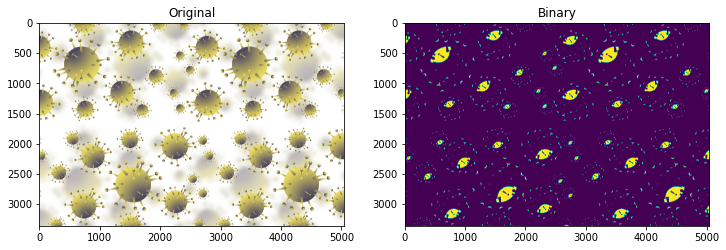

In [183]:
fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(virus);
ax[0].set_title('Original')

binary = rgb2gray(virus)<0.45
ax[1].imshow(binary)
ax[1].set_title('Binary')

# **Create structural element for Erosion and Dilution**

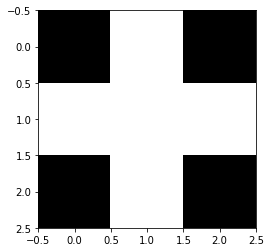

In [184]:
#we will create structural element to be used in erosion and dilation
x = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]])
plt.imshow(x, cmap='gray');

Text(0.5, 1.0, 'Binary')

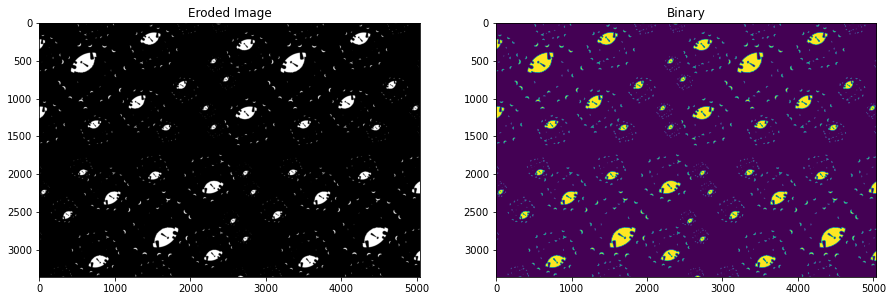

In [185]:
#Erosion- removes small objects so that key features will remain
#Dilation- makes the objects more visible

fig, ax=plt.subplots(1,2,figsize=(15, 5))
ax[0].imshow(erosion(binary, x), cmap='gray');
ax[0].set_title('Eroded Image')

ax[1].imshow(binary)
ax[1].set_title('Binary')

In [186]:
#multiple erosion
def multi_erosion(image, num, x=x):
    for i in range(num):
        image = erosion(image, x)
    return image

In [187]:
def multi_dilution(image, num, x=x):
    for i in range(num):
        image = dilation(image, x)
    return image


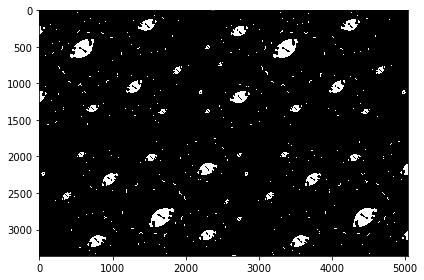

In [188]:
#apply multiple erosion
Eroded_Image = multi_erosion(binary, 2, x)
imshow(Eroded_Image)

Text(0.5, 1.0, 'Binary')

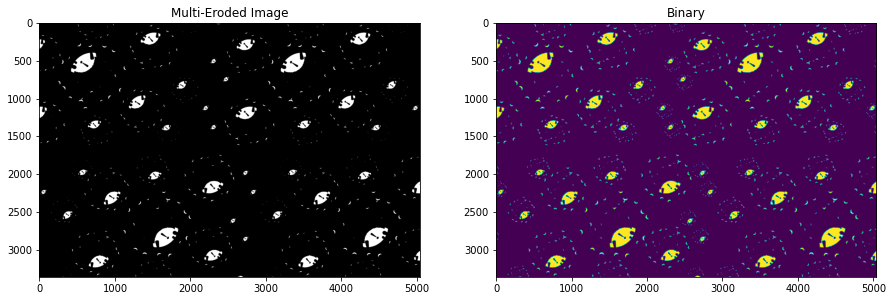

In [189]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(multi_erosion(binary, 2, x), cmap='gray')
ax[0].set_title('Multi-Eroded Image')


ax[1].imshow(binary)
ax[1].set_title('Binary')

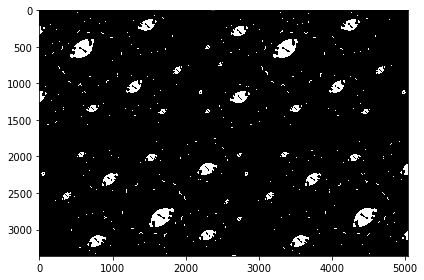

In [190]:
#we will apply the opening function to remove any minor noise left
opened_image = opening(Eroded_Image)
imshow(opened_image)

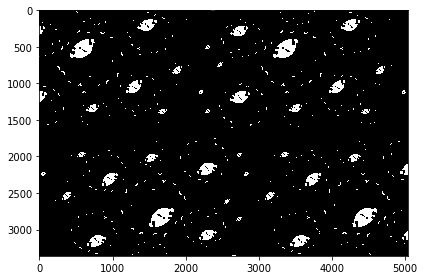

In [193]:
#we will apply dilation function to restore the size of original iage

diluted_image = multi_dilution(opened_image, 2, x)
imshow(diluted_image)

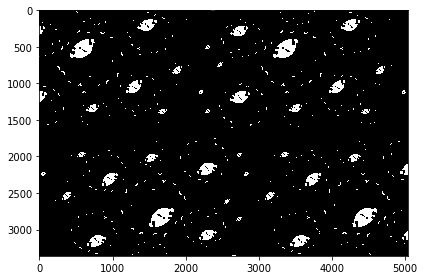

In [194]:
#make the image more clear by using area function
#it does not use a structural element but a deframed shape basis the threshold
morphed_image = area_opening(area_closing(diluted_image, 10), 10)
imshow(morphed_image)

# **Blob Detection using LoG, DoG, and DoH**

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.feature import blob_dog, blob_log, blob_doh

In [196]:
virus_morphed =morphed_image

Laplacian of Gaussian (LoG) on this binarized image
We will be only setting the min_sigma parameter on all methods. 
The rest will be the default parameter setting.

# Laplacian of Gaussian (LoG)

In [224]:
blobs = blob_log(virus_morphed, min_sigma=1,threshold=0.1)

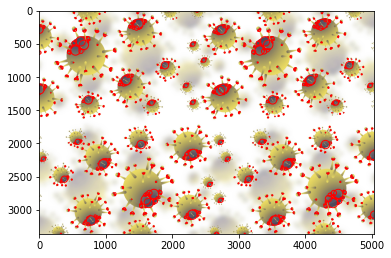

In [226]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(virus)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))

In [216]:
# Calculate the detected features in an image (blobs). This can have wider application and use cases
blobs[:, 2] = blobs[:, 2] * sqrt(2)
numrows = len(blobs)

In [217]:
print("blob counts",numrows)

blob counts 3948


# Difference of Gaussian (DoG)

In [218]:
#Difference of Gaussian (DoG)
blobs = blob_dog(virus_morphed, min_sigma=1,threshold=0.1)

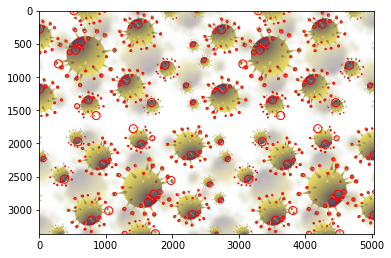

In [219]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(virus)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))

# Determinant of Hessian (DoH)

In [221]:
blobs = blob_doh(virus_morphed, min_sigma=1)

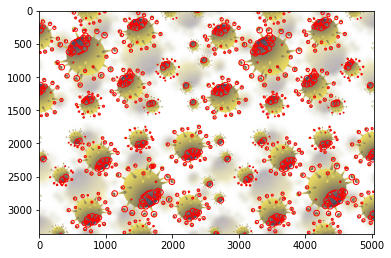

In [222]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(virus)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))